In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [3]:
import sys
sys.path.append('../')
import utils

train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = utils.read_files()
keys = [1, 2, 3]

On voit que la localisation est corrélée à 79 % ( .89 * .89 ) à la hauteur de la mesure -> logique et cohérent avec le dernier résultat
Sinon elle n'est corrélée à aucune autre variable à priori

Cette matrice de corrélation est par contre un peu différente de celles qui sont prises localisation par localisation (suite):

Mais on peut regrouper les variables fortement corrélées:

- date_calc, date_forecast: logique
- date_calc, absolute_humidity_2m:gm3: $\sim 60\%$
- date_calc, air_density_2m:kgm3: $\sim 50\%$
- date_calc, dew_point_2m: 
- dew_point_2m, absolute_humidity_2m:gm3: $\sim 98\%$ (point de rosée)
- 

In [4]:
frames = [[X_train_estimated_a, train_a], [X_train_observed_a, train_a.dropna()]]
X_train_observed_merged_result = pd.concat(frames[1], axis=0)
X_train_observed_merged_result.reset_index(drop=True, inplace=True)

In [5]:
frames_train_estimated = [X_train_estimated_a, X_train_estimated_b, X_train_estimated_c]
X_train_estimated = pd.concat(frames_train_estimated, keys=keys)
X_train_estimated.reset_index(level=0, inplace=True, names='location')

frames_train_observed = [X_train_observed_a, X_train_observed_b, X_train_observed_c]
X_train_observed = pd.concat(frames_train_observed, keys=keys)
X_train_observed.reset_index(level=0, inplace=True, names='location')

frames_test_estimated = [X_test_estimated_a, X_test_estimated_b, X_test_estimated_c]
X_test_estimated = pd.concat(frames_test_estimated, keys=keys)
X_test_estimated.reset_index(level=0, inplace=True, names='location')

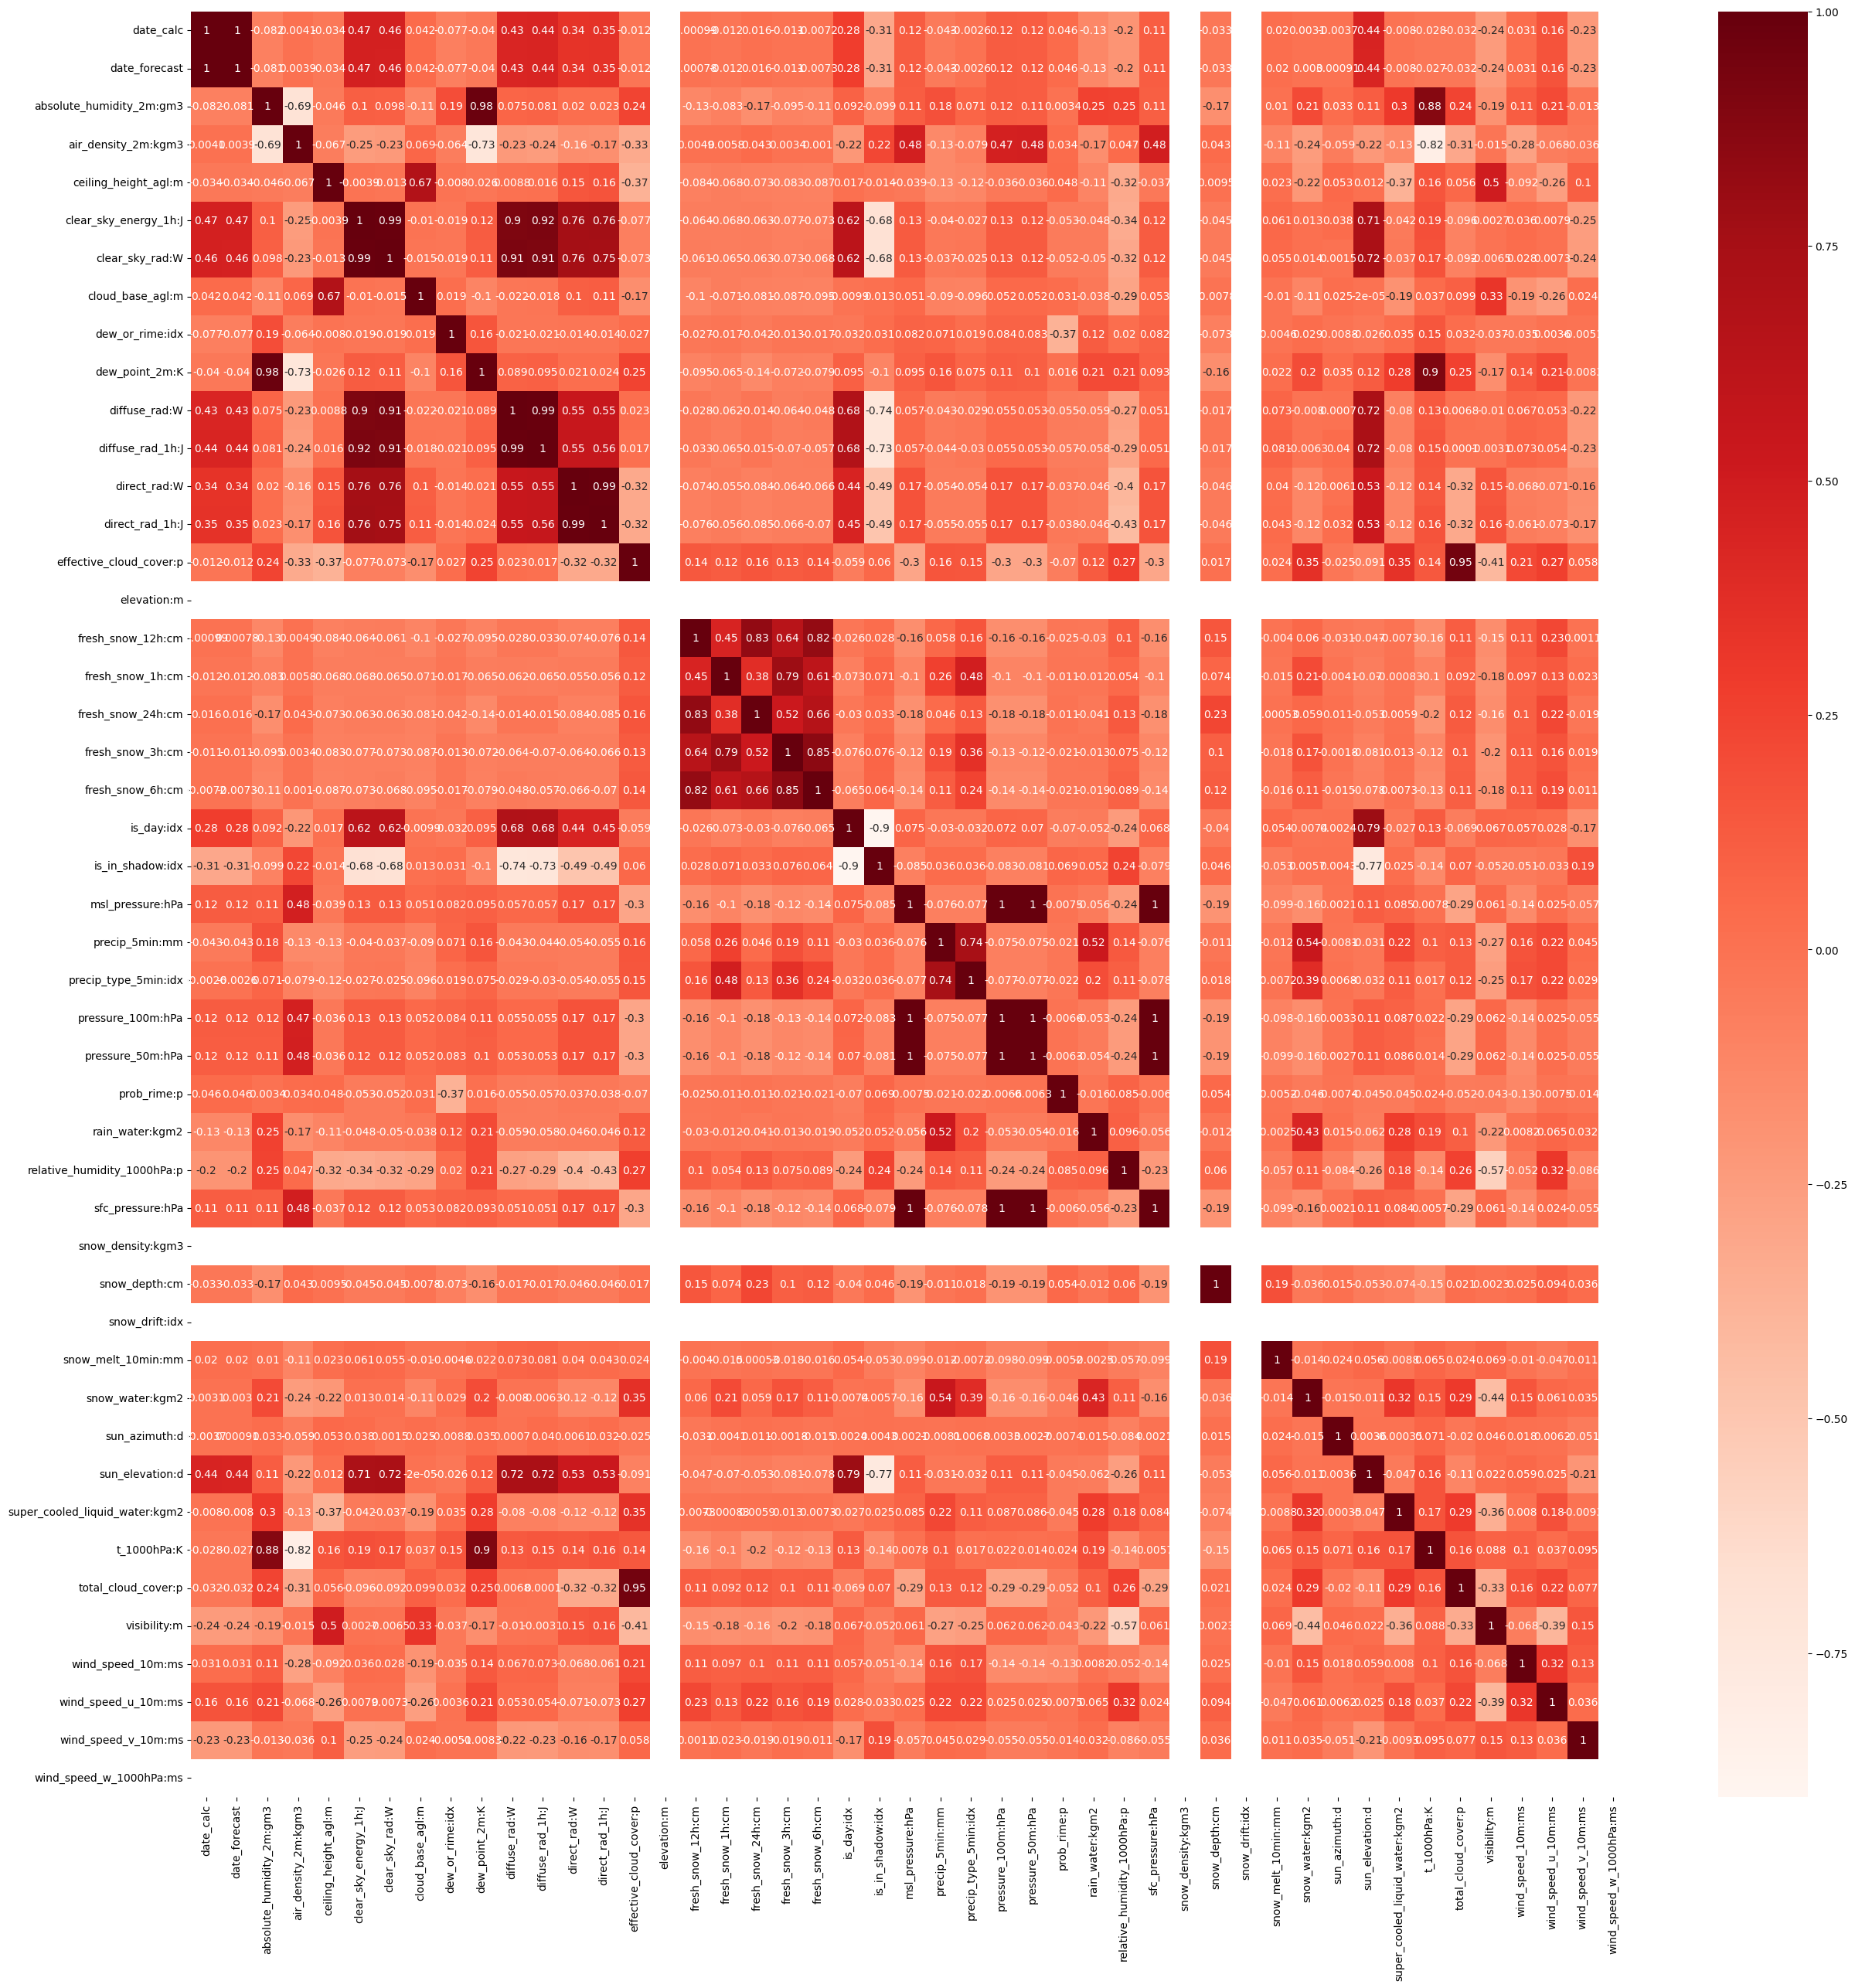

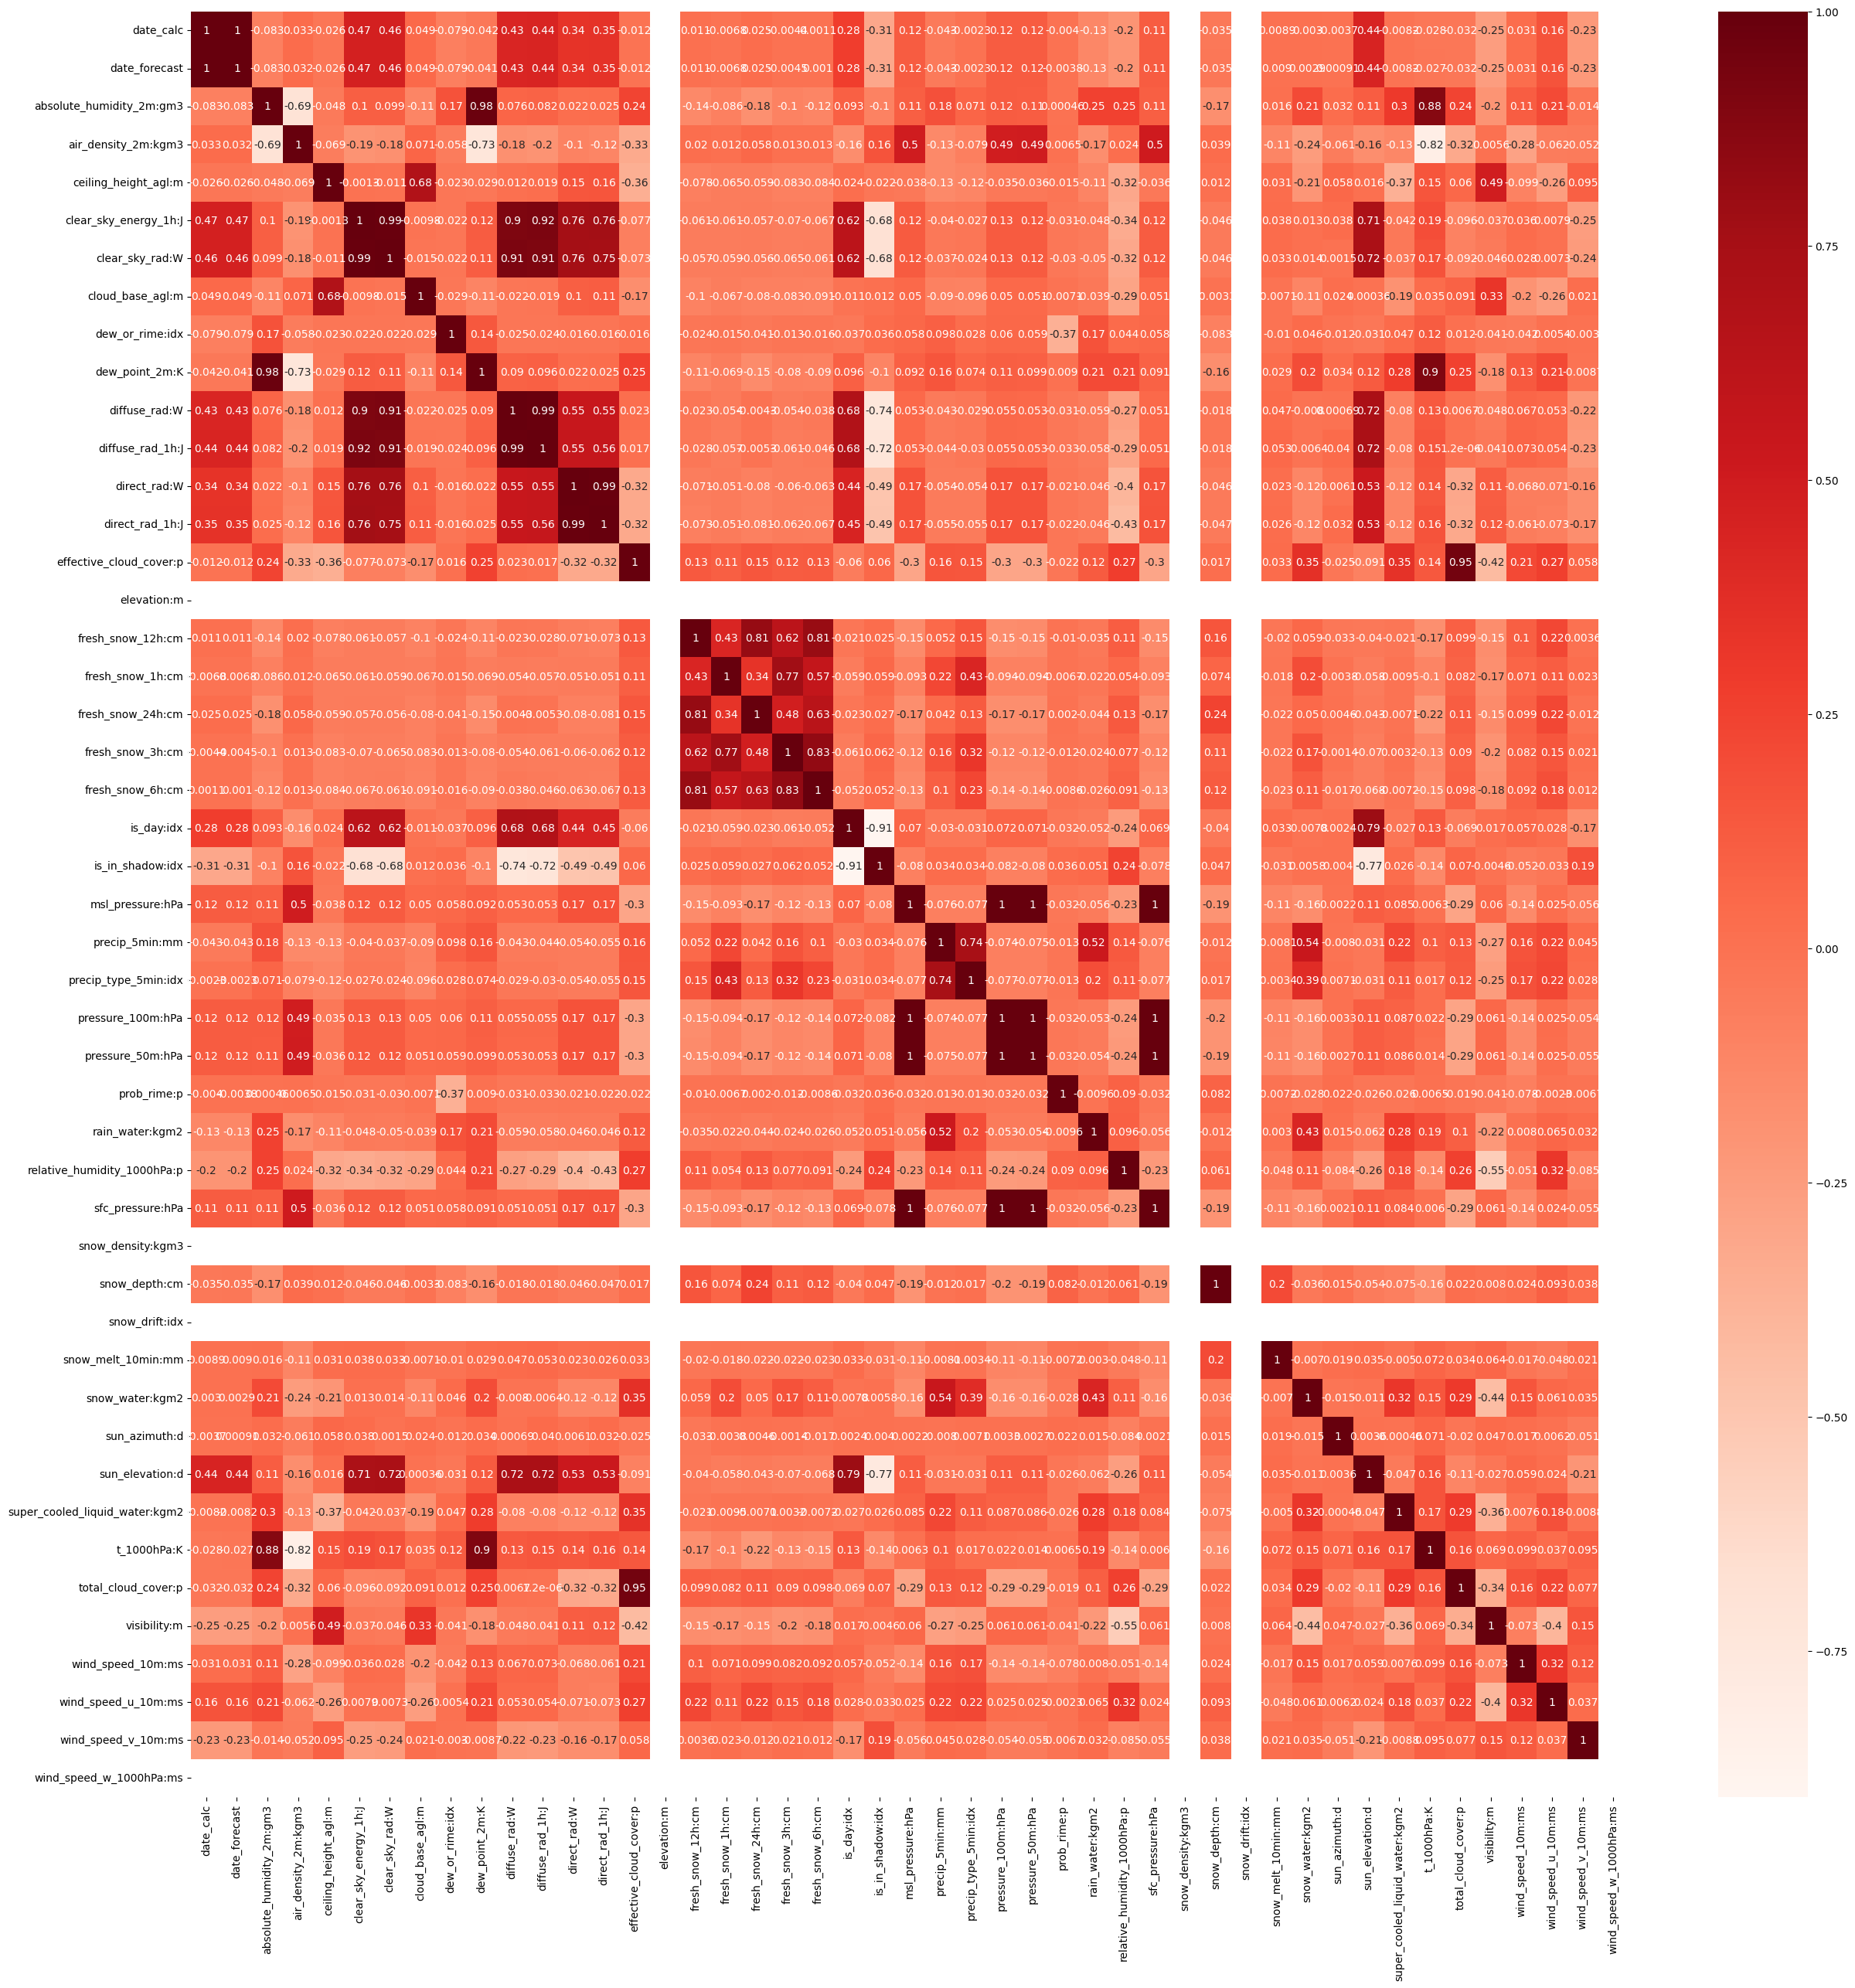

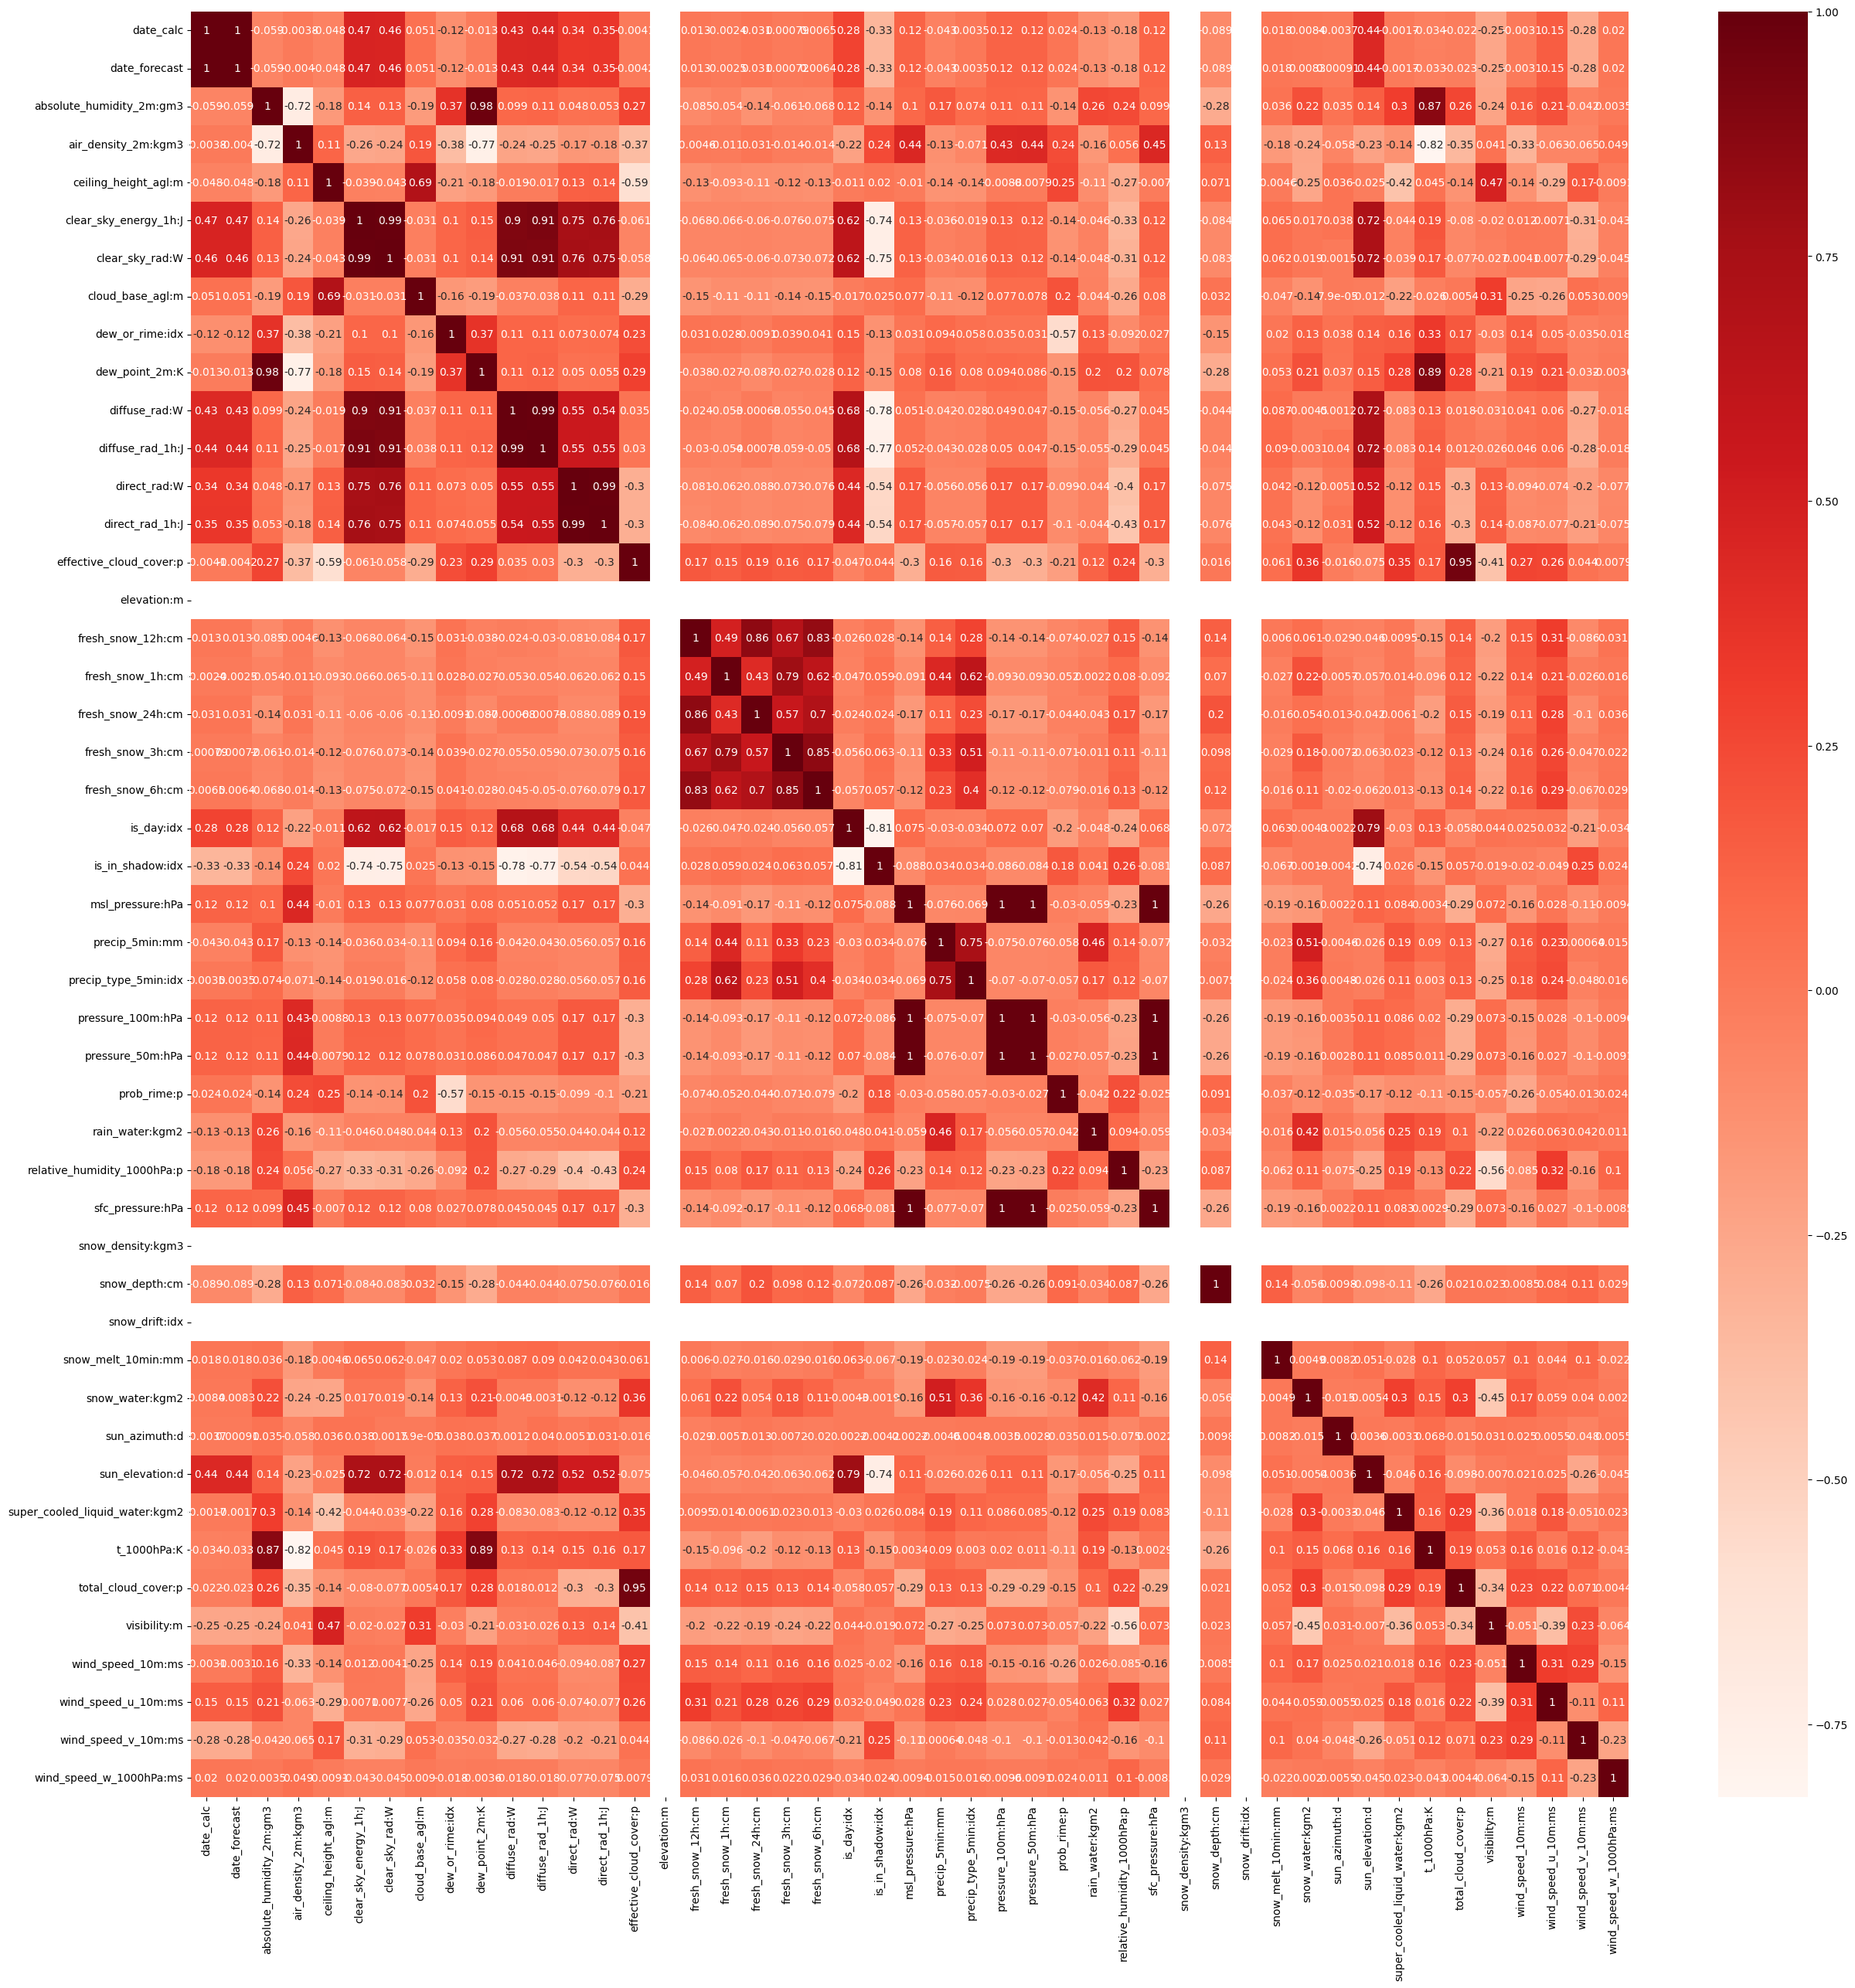

In [6]:
for frame in frames_train_estimated:
    utils.build_corr_matrix(frame, figsize=(30,30))